In [67]:
# basic IV test routine for single point single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

> <ipython-input-93-c08f6544a53d>(41)<module>()
-> G = markov_graph.generate_graph(graph_model, physics)
(Pdb) c


/Users/ssk4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: ComplexWarning: Casting complex values to real discards the imaginary part


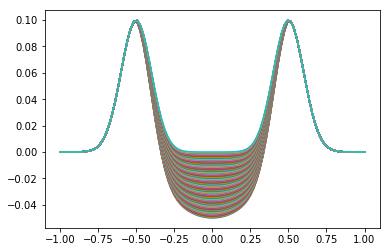

In [93]:
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)

N_v_points = 100
V_d_vec = np.linspace(-50e-3,0e-3,N_v_points)
I_vec = np.zeros(N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=1e-3,sigma=(x[1] - x[0]))

battery_ind = []
max_prob_node = []

for i in range(N_v_points):

    d = (0.5,V_d_vec[i])
    b1 = (100e-3,0.5,0.1)
    b2 = (100e-3,-0.5,0.1)

    plt.plot(x,V)                        
    mu_l = (0.5e-3,0.5e-3+0.01e-3)
    
    graph_model = (5,1)
    battery_weight = 1000
    kT = 100e-6
    physics = (x,V,K,mu_l,battery_weight,kT)

   
    if(i==0):
        import pdb;pdb.set_trace()
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
    else:
        G = markov_graph.recalculate_weights(G,physics)  
    I_vec[i] = markov_graph.get_current(G,battery_ind)
    max_prob_node += [markov_graph.get_max_prob_node(G)]


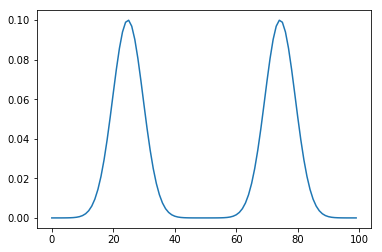

In [94]:
plt.plot(V)

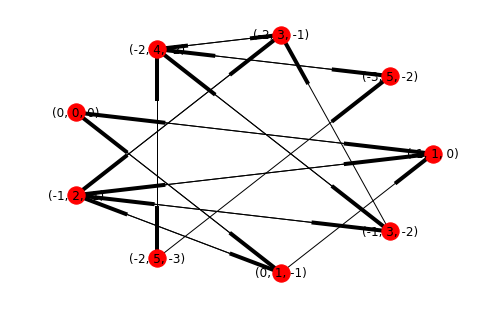

In [95]:
nx.draw_shell(G,with_labels=True)

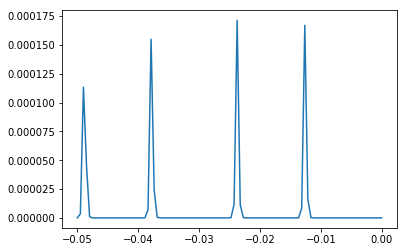

In [96]:
plt.plot(V_d_vec,I_vec)

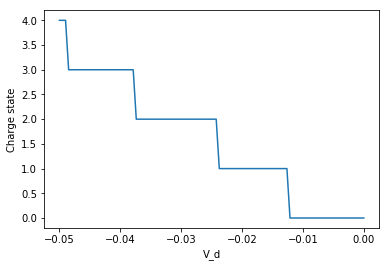

In [97]:
max_prob_node = np.array(max_prob_node)
plt.plot(V_d_vec,max_prob_node[:,1])
plt.xlabel('V_d')
plt.ylabel('Charge state')